# Data Science and Business analytics internship

# Task 4 - Prediction using Decision Tree 

In [5]:
#Import the relevent libraries

import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [7]:
#import Data

data = pd.read_csv('Iris.csv')

# take a look at the dataset

data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Data Exploration
lets first have descriptive exploration of our data

In [27]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data preprocessing
Checking the null values

In [28]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

we can see there are no null values in the dataset

In [29]:
data.drop(columns=['Id'])


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Checking for Outliers in each of the column by visualising on boxplot.

<AxesSubplot:xlabel='SepalLengthCm'>

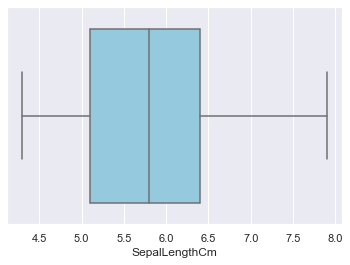

In [30]:
sns.boxplot(data=data,x='SepalLengthCm', color = 'skyblue')

<AxesSubplot:xlabel='PetalWidthCm'>

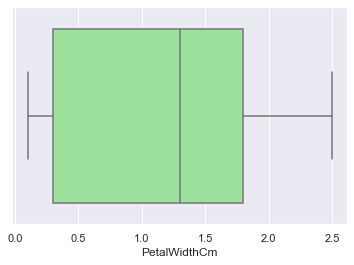

In [31]:
sns.boxplot(data=data,x='PetalWidthCm', color = 'lightGreen')

<AxesSubplot:xlabel='PetalLengthCm'>

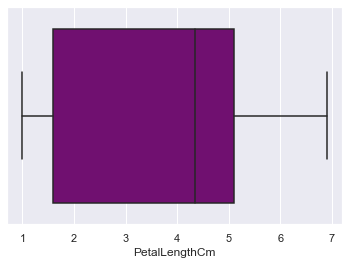

In [32]:
sns.boxplot(data = data,x ='PetalLengthCm',color = 'Purple')

<AxesSubplot:xlabel='SepalWidthCm'>

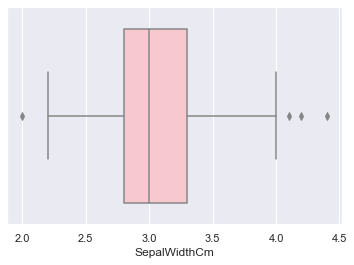

In [33]:
sns.boxplot(data=data,x='SepalWidthCm',color = 'pink')

From the above boxplot graphs we can see there are outliers only in sepal width. let's remove them.

In [34]:
#Removing the outliers 

q3 = data['SepalWidthCm'].quantile(.75)
q1 = data['SepalWidthCm'].quantile(.25)
iqr = q3-q1
iqr
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
data2 = data[(data['SepalWidthCm']>bottomrange) & (data['SepalWidthCm']<upperrange)]


<AxesSubplot:xlabel='SepalWidthCm'>

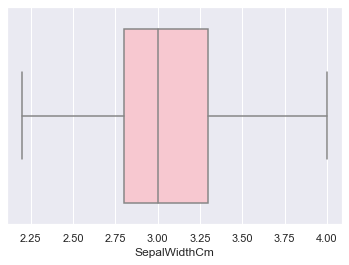

In [35]:
sns.boxplot(data=data2,x='SepalWidthCm',color = 'pink')

# Preparing data for train/test split

In [36]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [37]:
y = data["Species"]
y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

# Modeling

In [40]:
flowerTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
flowerTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [41]:
clf =flowerTree.fit(X_trainset,y_trainset)

# Prediction

In [42]:
predTree = flowerTree.predict(X_testset)

In [43]:
print (predTree [0:5])
print (y_testset [0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
47    Iris-setosa
3     Iris-setosa
31    Iris-setosa
25    Iris-setosa
15    Iris-setosa
Name: Species, dtype: object


# Evaluation

Lets check the accuracy of the model

In [44]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9333333333333333


# Visualize the tree

[Text(355.725, 587.0880000000001, 'X[3] <= 0.8\nentropy = 1.584\nsamples = 105\nvalue = [33, 36, 36]'),
 Text(237.15000000000003, 456.624, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(474.30000000000007, 456.624, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 72\nvalue = [0, 36, 36]'),
 Text(237.15000000000003, 326.1600000000001, 'X[3] <= 1.65\nentropy = 0.191\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(118.57500000000002, 195.69600000000003, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(355.725, 195.69600000000003, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(711.45, 326.1600000000001, 'X[3] <= 1.85\nentropy = 0.398\nsamples = 38\nvalue = [0, 3, 35]'),
 Text(592.8750000000001, 195.69600000000003, 'X[2] <= 5.3\nentropy = 0.75\nsamples = 14\nvalue = [0, 3, 11]'),
 Text(474.30000000000007, 65.23200000000008, 'entropy = 0.954\nsamples = 8\nvalue = [0, 3, 5]'),
 Text(711.45, 65.23200000000008, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(830.025000000

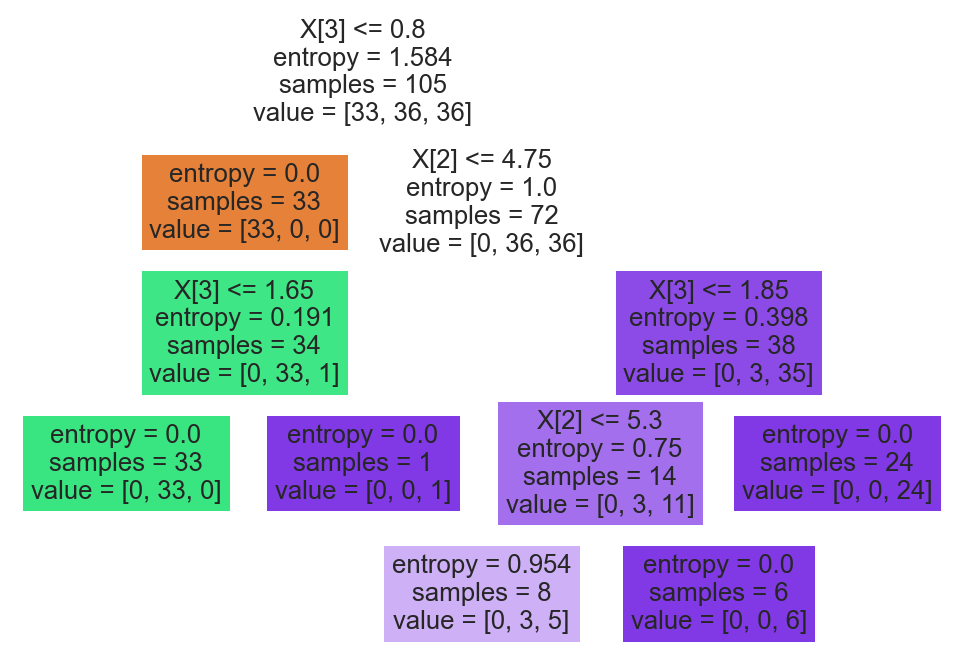

In [48]:
plt.figure(figsize=(17,12))
tree.plot_tree(clf,filled = 'True')

In [46]:
print(tree.export_text(clf))

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: Iris-virginica
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.85
|   |   |   |--- feature_2 <= 5.30
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_2 >  5.30
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_3 >  1.85
|   |   |   |--- class: Iris-virginica

